In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [31]:
#Data Exploration:
#Load the dataset and perform exploratory data analysis (EDA).
df1 = pd.read_csv(r"C:\Users\Dell\Downloads\Logistic Regression\Logistic Regression\Titanic_train.csv")
df2 = pd.read_csv(r"C:\Users\Dell\Downloads\Logistic Regression\Logistic Regression\Titanic_test.csv")

In [32]:
df1

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [33]:
df2

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

In [34]:
if 'Survived' not in df3.columns:
    df2['Survived'] = None

In [35]:
df3 = pd.concat([df1,df2,],ignore_index=True)

In [36]:
df3

PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare Cabin Embarked  
0         0           A/5 21171    7.2500   NaN        S  
1         0            PC 17599   71.2833   C85        C  
2         0    STON/O2. 3101282    7.9250   NaN        S  
3         0              113803   53.1000  C123        S  
4         0              373450    8.0500   NaN        S  
...     ...                 ...       ...   ...      ...  
1304      0           A.5. 3236    8.0500   NaN        S  
1305      0            PC 17758  108.9000  C105        C  
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
1307      0              359309    8.0500   NaN        S  
1308      1                2668   22.3583   NaN        C  

[1309 rows x 12 columns]

In [38]:
#Examine the features, their types, and summary statistics.
df3.describe()

PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.020061    0.486592     0.837836    14.413493     1.041658   
min       1.000000    0.000000     1.000000     0.170000     0.000000   
25%     328.000000    0.000000     2.000000    21.000000     0.000000   
50%     655.000000    0.000000     3.000000    28.000000     0.000000   
75%     982.000000    1.000000     3.000000    39.000000     1.000000   
max    1309.000000    1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1308.000000  
mean      0.385027    33.295479  
std       0.865560    51.758668  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200

In [39]:
df3.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [40]:
df3.info

<bound method DataFrame.info of       PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

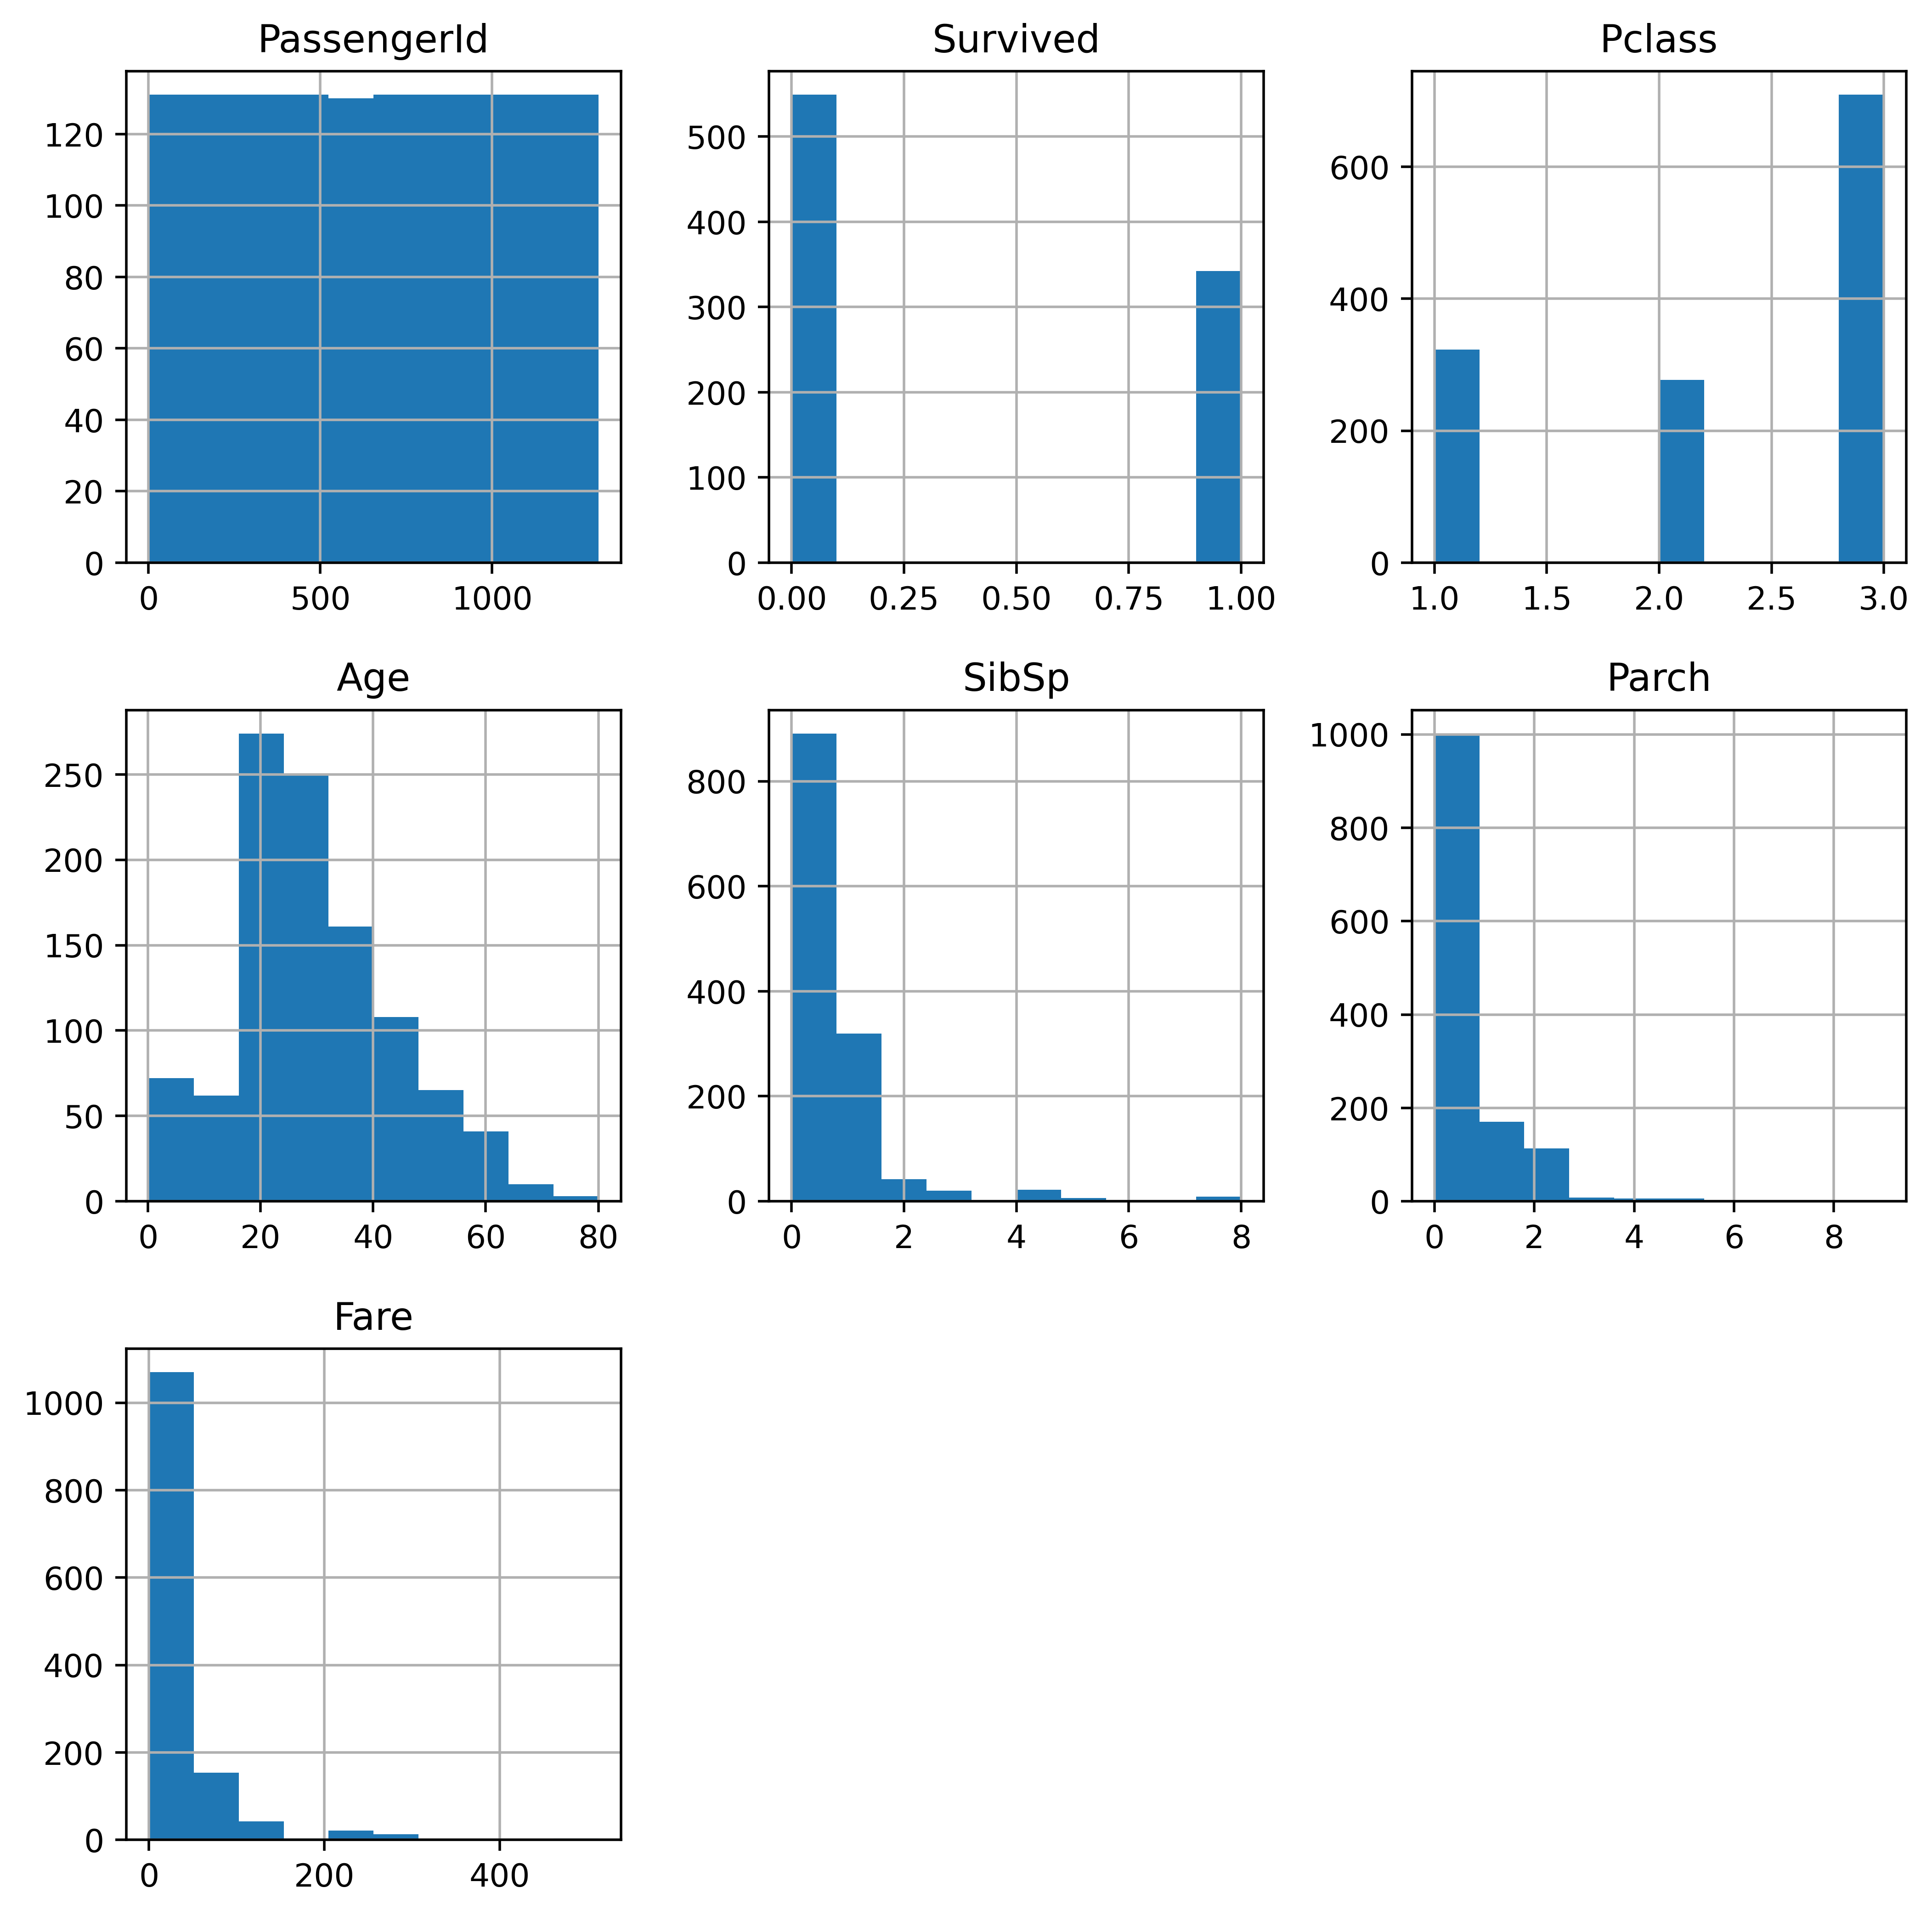

In [41]:
#Create visualizations such as histograms, box plots, or pair plots to visualize
#the distributions and relationships between features.
df3.hist()

<Axes: >

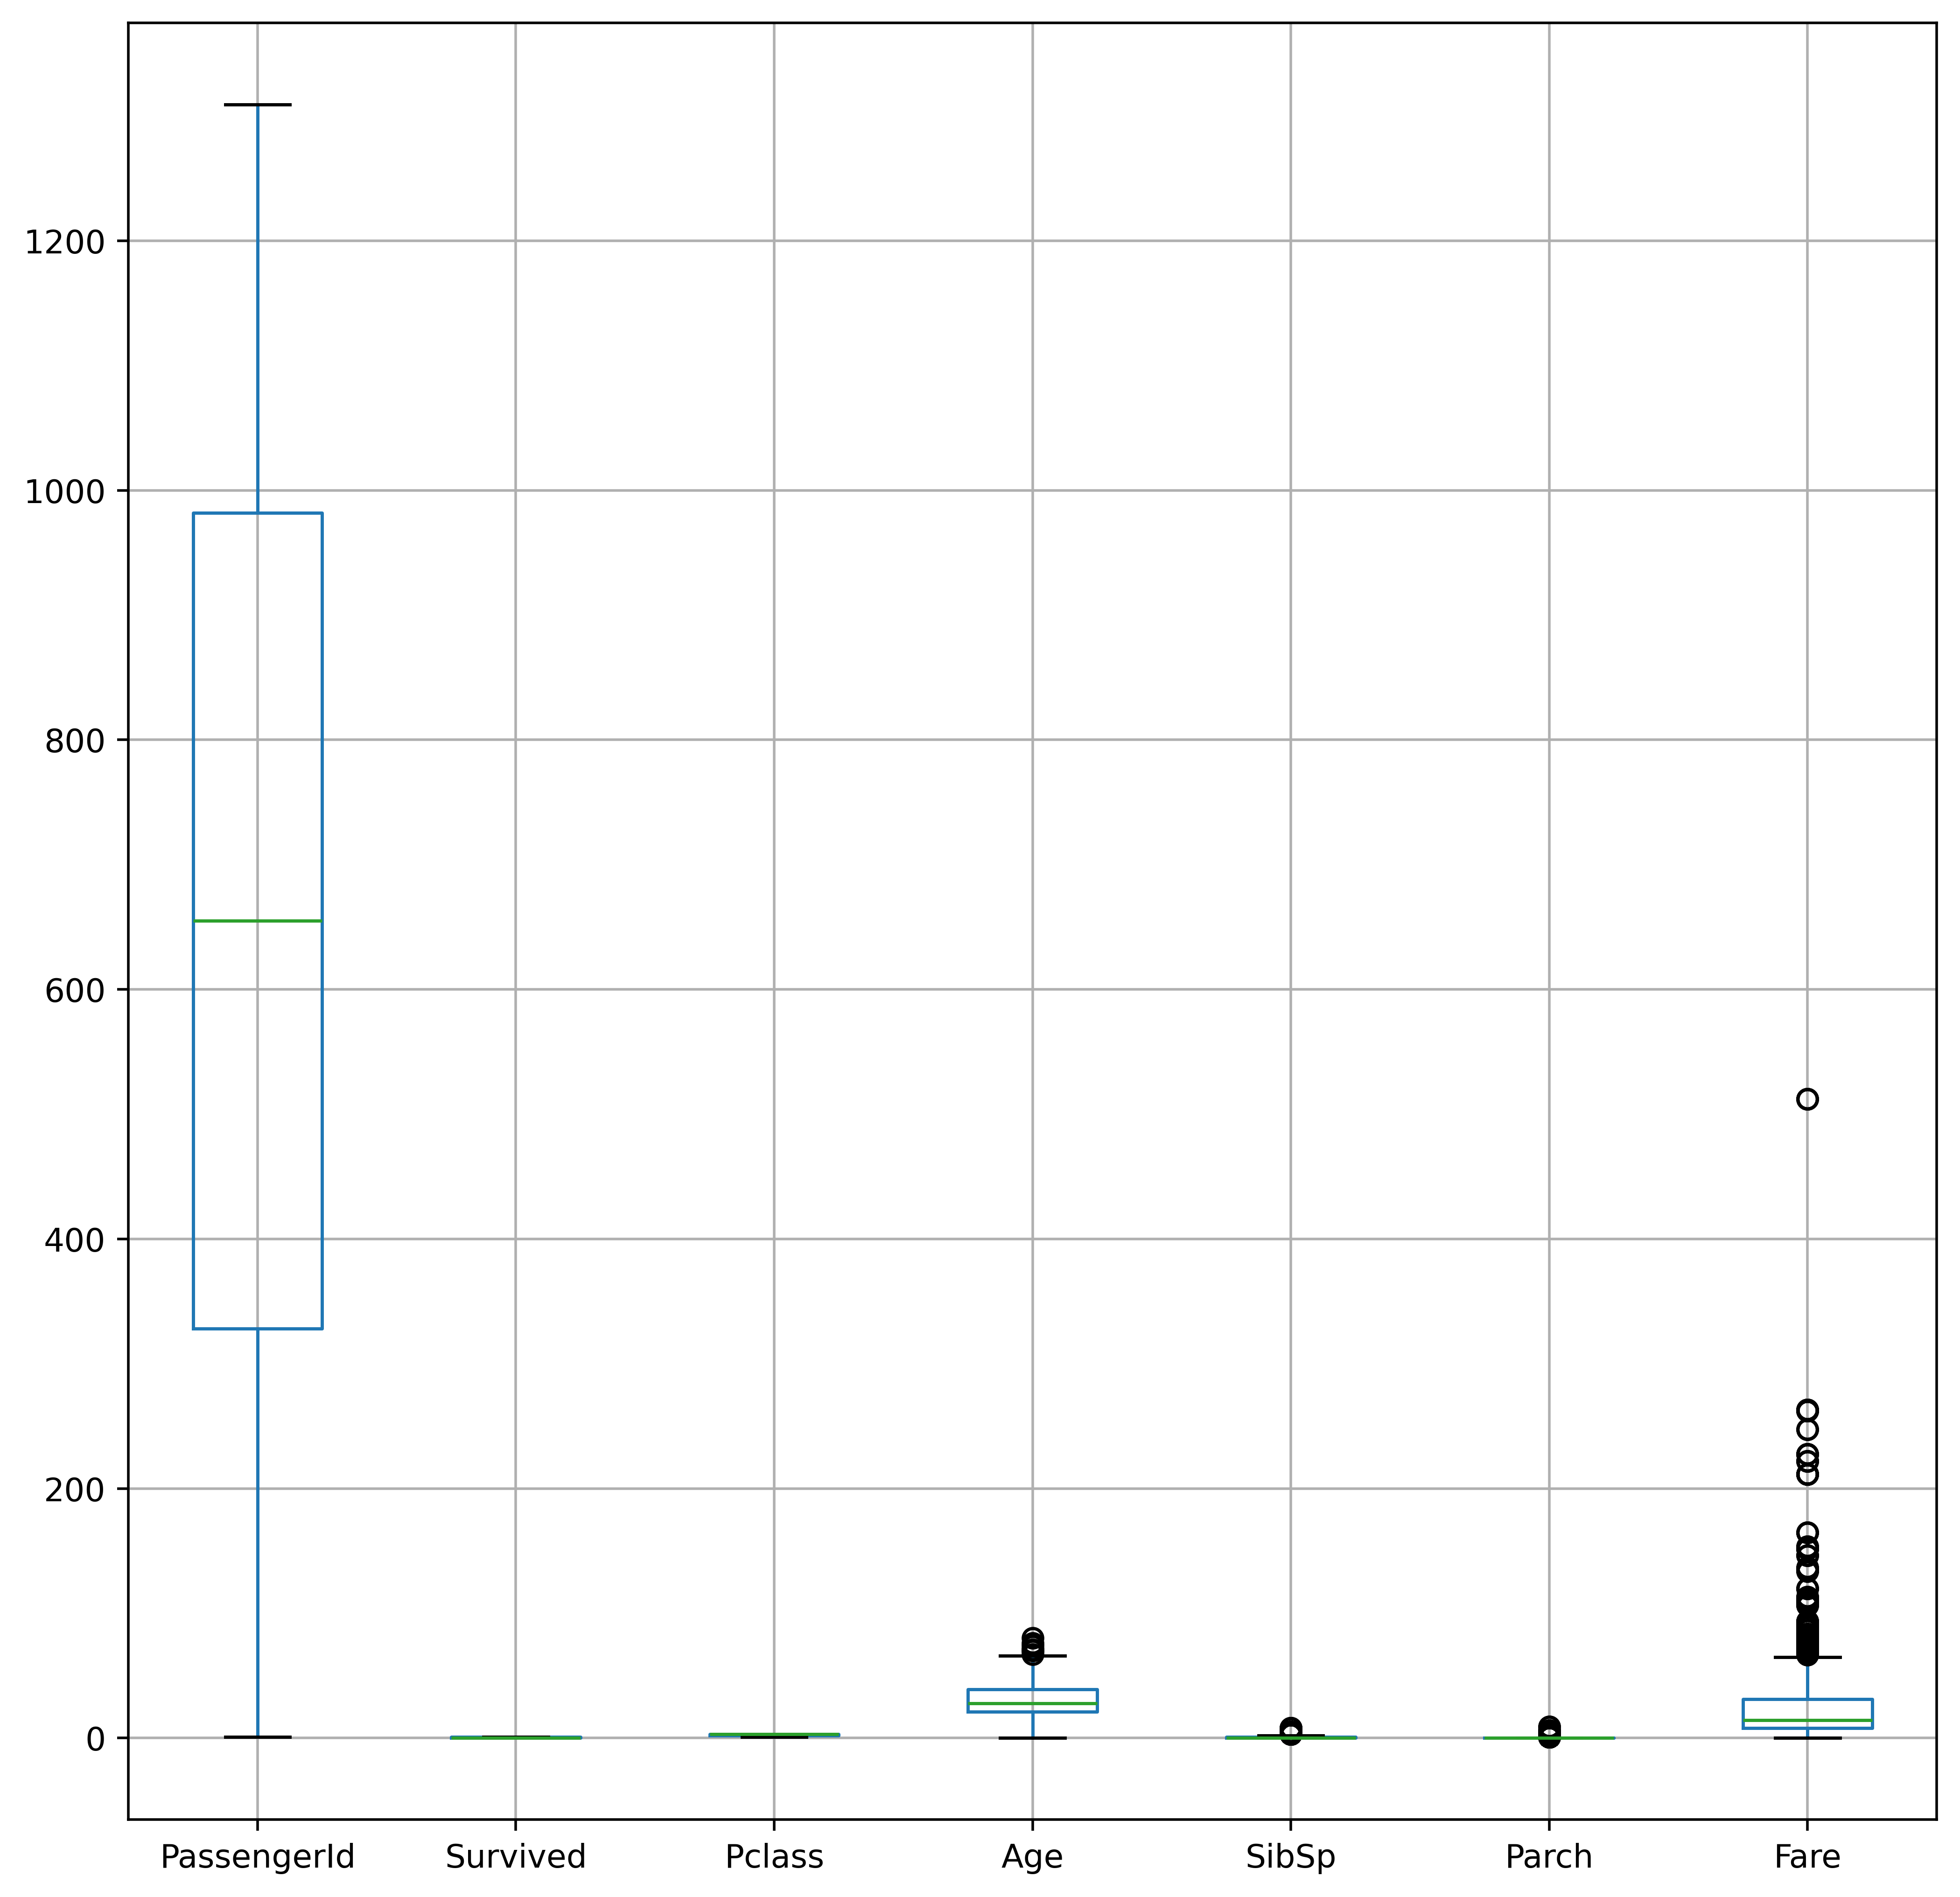

In [42]:
df3.boxplot()

In [43]:
sns.pairplot(df3)

In [44]:
df3.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.038354  0.028814 -0.055224  0.008942   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.038354 -0.338481  1.000000 -0.408106  0.060832  0.018322   
Age             0.028814 -0.077221 -0.408106  1.000000 -0.243699 -0.150917   
SibSp          -0.055224 -0.035322  0.060832 -0.243699  1.000000  0.373587   
Parch           0.008942  0.081629  0.018322 -0.150917  0.373587  1.000000   
Fare            0.031428  0.257307 -0.558629  0.178740  0.160238  0.221539   

                 Fare  
PassengerId  0.031428  
Survived     0.257307  
Pclass      -0.558629  
Age          0.178740  
SibSp        0.160238  
Parch        0.221539  
Fare         1.000000

<Axes: >

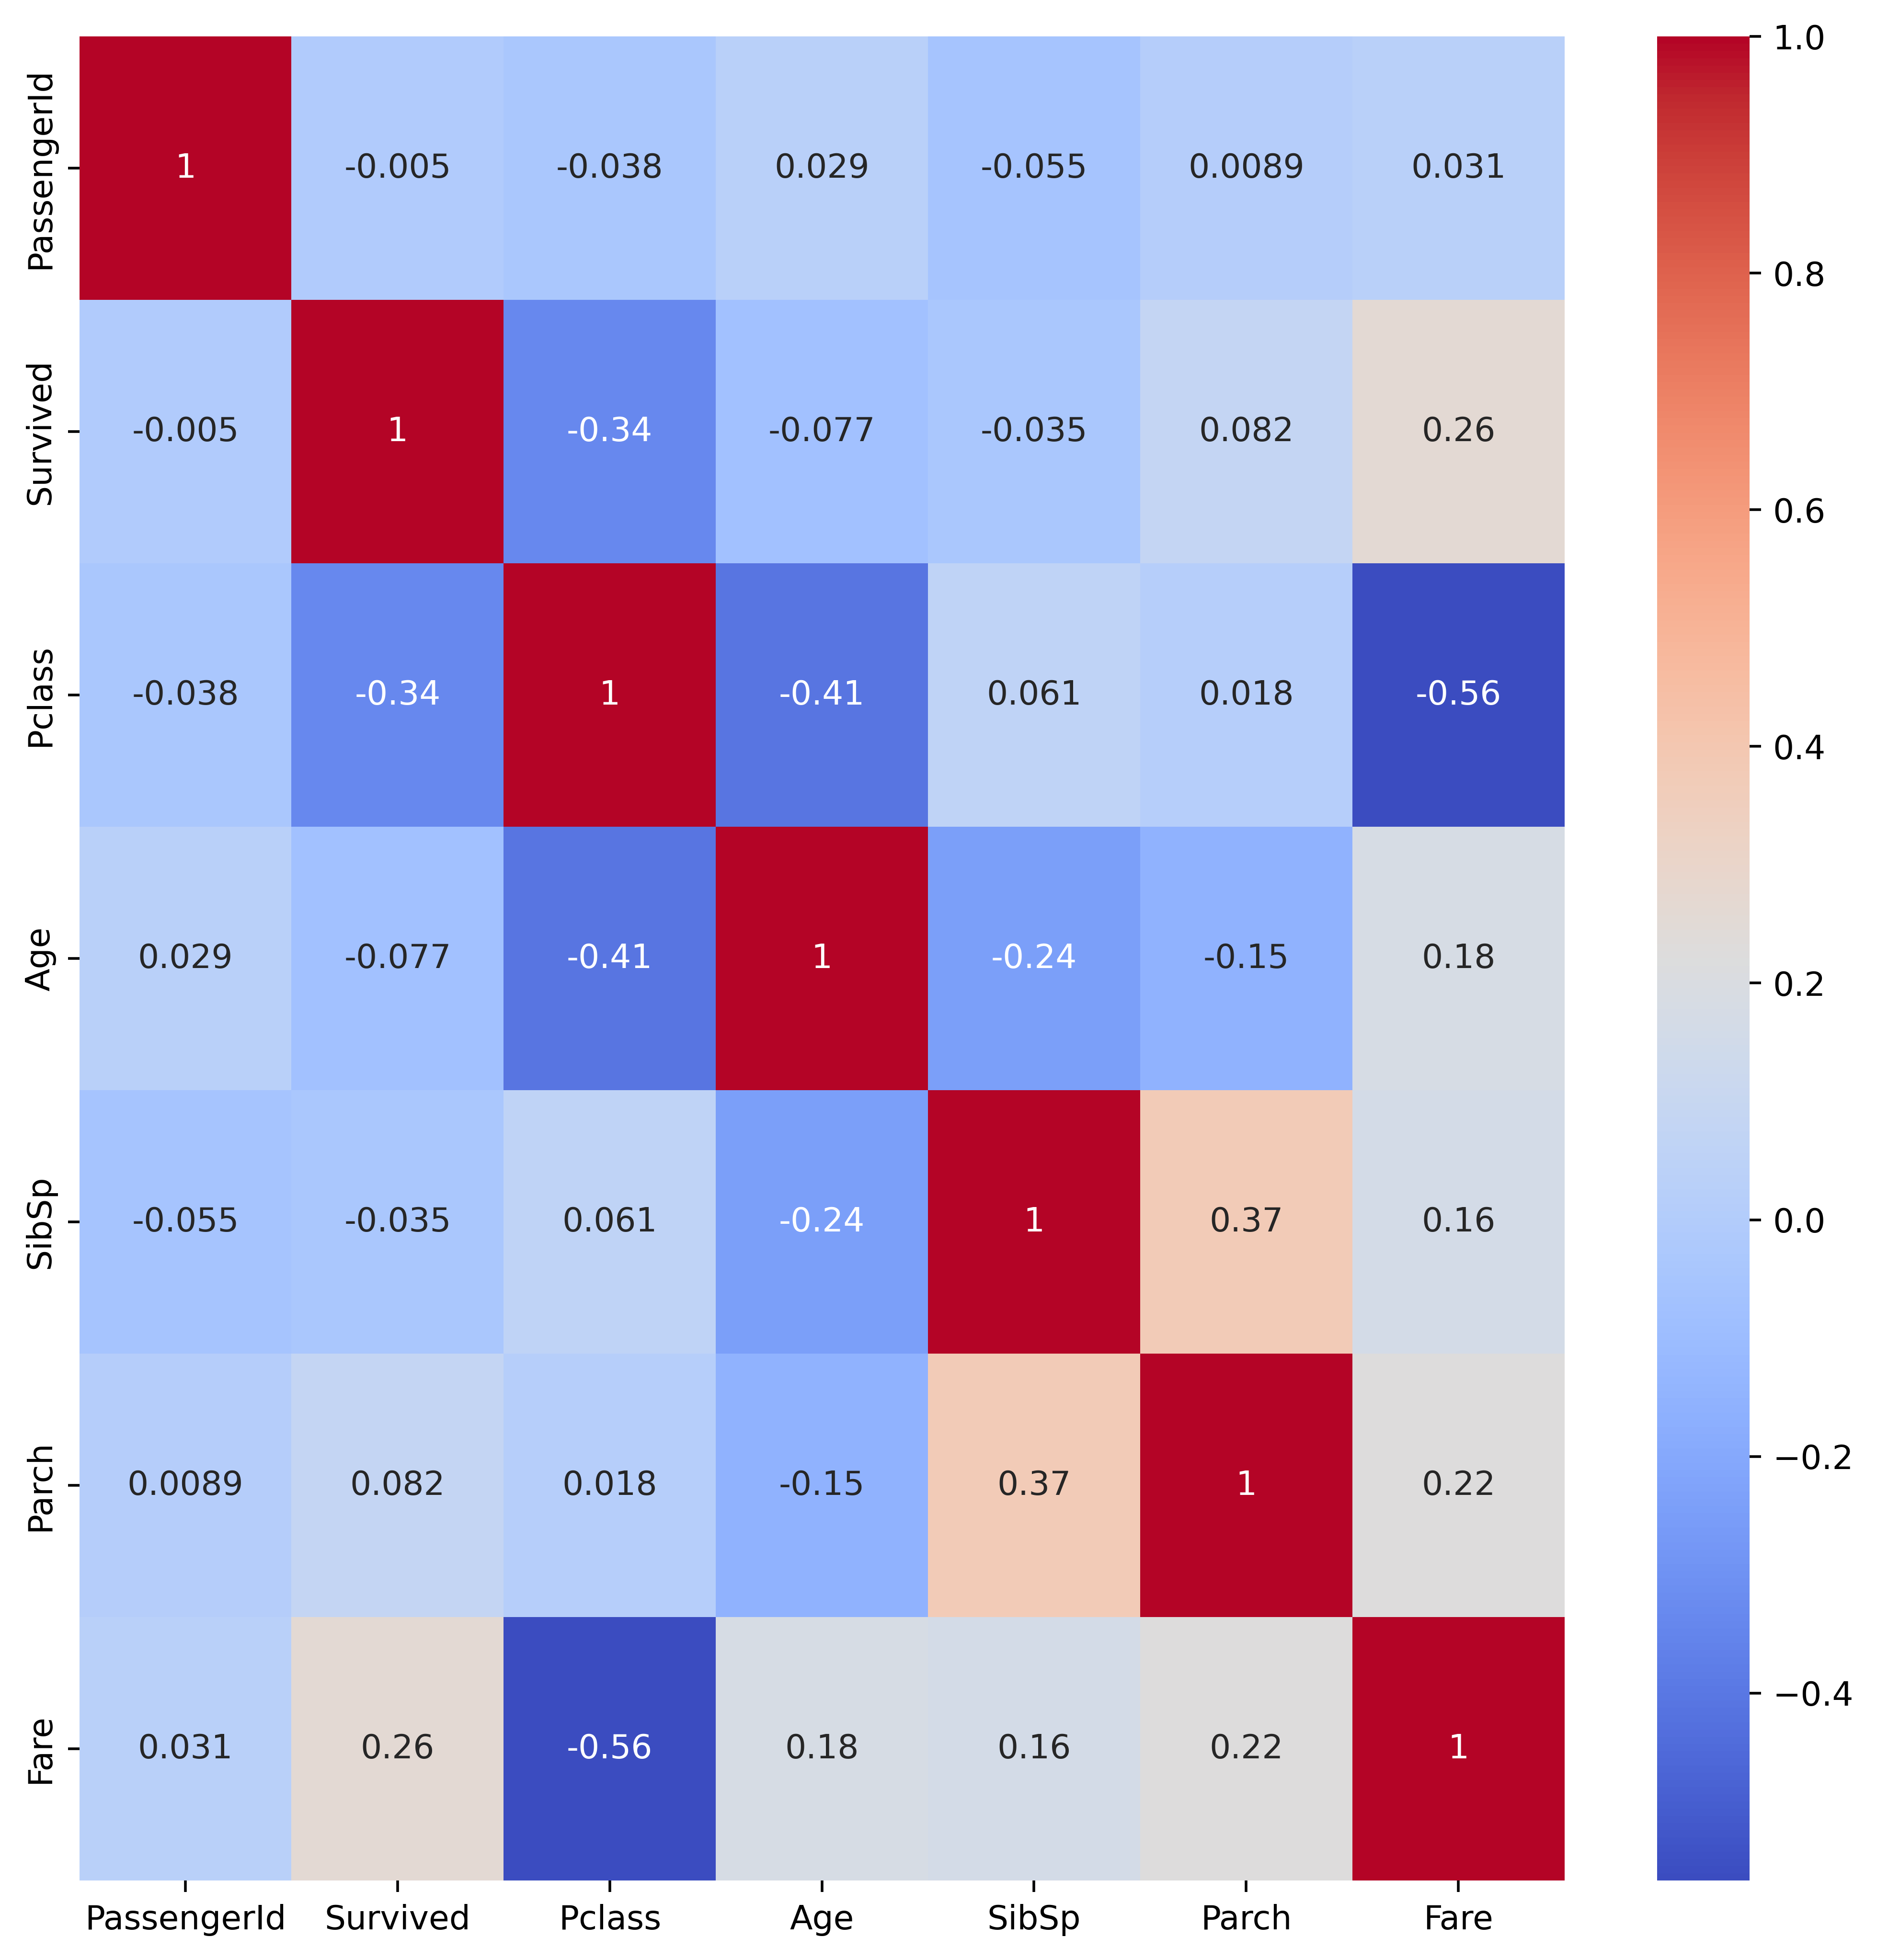

In [45]:
sns.heatmap(df3.corr(),annot=True,cmap='coolwarm')

In [50]:
#Data Preprocessing:
#Handle missing values (e.g., imputation).
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [49]:
for i in df3.isnull().sum():
    print((i/891)*100,'%')

0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %


In [48]:
df3 = df3.dropna()

In [51]:
#Encode categorical variables:
#we have to convert categorial data into numerical since machine learning doesn't understand categorial value
df3['Sex'] = df3['Sex'].map({'male': 0, 'female': 1}) #here map() will replace each value 
df3['Embarked'] = df3['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [53]:
df3

PassengerId  Survived  Pclass  \
1              2       1.0       1   
3              4       1.0       1   
6              7       0.0       1   
10            11       1.0       3   
11            12       1.0       1   
..           ...       ...     ...   
871          872       1.0       1   
872          873       0.0       1   
879          880       1.0       1   
887          888       1.0       1   
889          890       1.0       1   

                                                  Name  Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
6                              McCarthy, Mr. Timothy J    0  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut    1   4.0      1   
11                            Bonnell, Miss. Elizabeth    1  58.0      0   
..                                                 ...  ...   ...    ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)    1  47.0      1   
872                           Carlsson, Mr. Frans Olof    0  33.0      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)    1  56.0      0   
887                       Graham, Miss. Margaret Edith    1  19.0      0   
889                              Behr, Mr. Karl Howell    0  26.0      0   

     Parch    Ticket     Fare        Cabin  Embarked  
1        0  PC 17599  71.2833          C85         1  
3        0    113803  53.1000         C123         0  
6        0     17463  51.8625          E46         0  
10       1   PP 9549  16.7000           G6         0  
11       0    113783  26.5500         C103         0  
..     ...       ...      ...          ...       ...  
871      1     11751  52.5542          D35         0  
872      0       695   5.0000  B51 B53 B55         0  
879      1     11767  83.1583          C50         1  
887      0    112053  30.0000          B42         0  
889      0    111369  30.0000         C148         1  

[183 rows x 12 columns]

In [54]:
data = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x = df3[data]
y = df3['Survived'].values
y.shape

(183,)

In [55]:
x

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
1         1    1  38.0      1      0  71.2833         1
3         1    1  35.0      1      0  53.1000         0
6         1    0  54.0      0      0  51.8625         0
10        3    1   4.0      1      1  16.7000         0
11        1    1  58.0      0      0  26.5500         0
..      ...  ...   ...    ...    ...      ...       ...
871       1    1  47.0      1      1  52.5542         0
872       1    0  33.0      0      0   5.0000         0
879       1    1  56.0      0      1  83.1583         1
887       1    1  19.0      0      0  30.0000         0
889       1    0  26.0      0      0  30.0000         1

[183 rows x 7 columns]

In [56]:
#Split the data
train_test_split(x,y,train_size=0.8)

[     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
 297       1    1   2.0      1      2  151.5500         0
 802       1    0  11.0      1      2  120.0000         0
 96        1    0  71.0      0      0   34.6542         1
 438       1    0  64.0      1      4  263.0000         0
 124       1    0  54.0      0      1   77.2875         0
 ..      ...  ...   ...    ...    ...       ...       ...
 879       1    1  56.0      0      1   83.1583         1
 341       1    1  24.0      3      2  263.0000         0
 556       1    1  48.0      1      0   39.6000         1
 577       1    1  39.0      1      0   55.9000         0
 345       2    1  24.0      0      0   13.0000         0
 
 [146 rows x 7 columns],
      Pclass  Sex    Age  SibSp  Parch      Fare  Embarked
 809       1    1  33.00      1      0   53.1000         0
 215       1    1  31.00      1      0  113.2750         1
 741       1    0  36.00      1      0   78.8500         0
 621       1    0  42.00      1      0   

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [58]:
x_train

Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
331       1    0  45.5      0      0   28.5000         0
336       1    0  29.0      1      0   66.6000         0
193       2    0   3.0      1      1   26.0000         0
75        3    0  25.0      0      0    7.6500         0
248       1    0  37.0      1      1   52.5542         0
..      ...  ...   ...    ...    ...       ...       ...
520       1    1  30.0      0      0   93.5000         0
92        1    0  46.0      1      0   61.1750         0
460       1    0  48.0      0      0   26.5500         0
872       1    0  33.0      0      0    5.0000         0
505       1    0  18.0      1      0  108.9000         1

[146 rows x 7 columns]

In [59]:
y_train

array([0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0.])

In [60]:
x_test

Pclass  Sex    Age  SibSp  Parch      Fare  Embarked
118       1    0  24.00      0      1  247.5208         1
251       3    1  29.00      1      1   10.4625         0
742       1    1  21.00      2      2  262.3750         1
544       1    0  50.00      1      0  106.4250         1
712       1    0  48.00      1      0   52.0000         0
96        1    0  71.00      0      0   34.6542         1
139       1    0  24.00      0      0   79.2000         1
337       1    1  41.00      0      0  134.5000         1
577       1    1  39.00      1      0   55.9000         0
492       1    0  55.00      0      0   30.5000         0
487       1    0  58.00      0      0   29.7000         1
765       1    1  51.00      1      0   77.9583         0
339       1    0  45.00      0      0   35.5000         0
835       1    1  39.00      1      1   83.1583         1
262       1    0  52.00      1      1   79.6500         0
97        1    0  23.00      0      1   63.3583         1
291       1    1  19.00      1      0   91.0792         1
209       1    0  40.00      0      0   31.0000         1
429       3    0  32.00      0      0    8.0500         0
307       1    1  17.00      1      0  108.9000         1
779       1    1  43.00      0      1  211.3375         0
609       1    1  40.00      0      0  153.4625         0
707       1    0  42.00      0      0   26.2875         0
183       2    0   1.00      2      1   39.0000         0
54        1    0  65.00      0      1   61.9792         1
618       2    1   4.00      2      1   39.0000         0
318       1    1  31.00      0      2  164.8667         0
110       1    0  47.00      0      0   52.0000         0
717       2    1  27.00      0      0   10.5000         0
556       1    1  48.00      1      0   39.6000         1
369       1    1  24.00      0      0   69.3000         1
305       1    0   0.92      1      2  151.5500         0
583       1    0  36.00      0      0   40.1250         1
710       1    1  24.00      0      0   49.5042         1
332       1    0  38.00      0      1  153.4625         0
177       1    1  50.00      0      0   28.7125         1
853       1    1  16.00      0      1   39.4000         0

In [61]:
y_test

array([0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 1.])

In [62]:
#creating the model
#we already import the library above
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [63]:
#evaluate the model
y_pred = LR.predict(x_test)
y_pred
y_pred_proba = LR.predict_proba(x_test)[:, 1]
y_pred_proba

array([0.72561322, 0.76298555, 0.95230935, 0.53310935, 0.40345704,
       0.3593979 , 0.71042227, 0.94794012, 0.90453716, 0.36027039,
       0.44745038, 0.87561097, 0.43268023, 0.91987983, 0.31708559,
       0.63727432, 0.96667778, 0.57849214, 0.29008802, 0.96977238,
       0.90452346, 0.92578058, 0.44882342, 0.52032829, 0.339955  ,
       0.91389914, 0.89681251, 0.42801593, 0.89027705, 0.91684302,
       0.96238971, 0.63803044, 0.61178966, 0.96064773, 0.47210245,
       0.91590972, 0.93253215])

In [66]:
#we a have already import all the required library above
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

In [67]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.76
Precision: 0.77
Recall: 0.87
F1-score: 0.82
ROC-AUC: 0.72


In [68]:
#calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

ROC AUC Score: 0.83


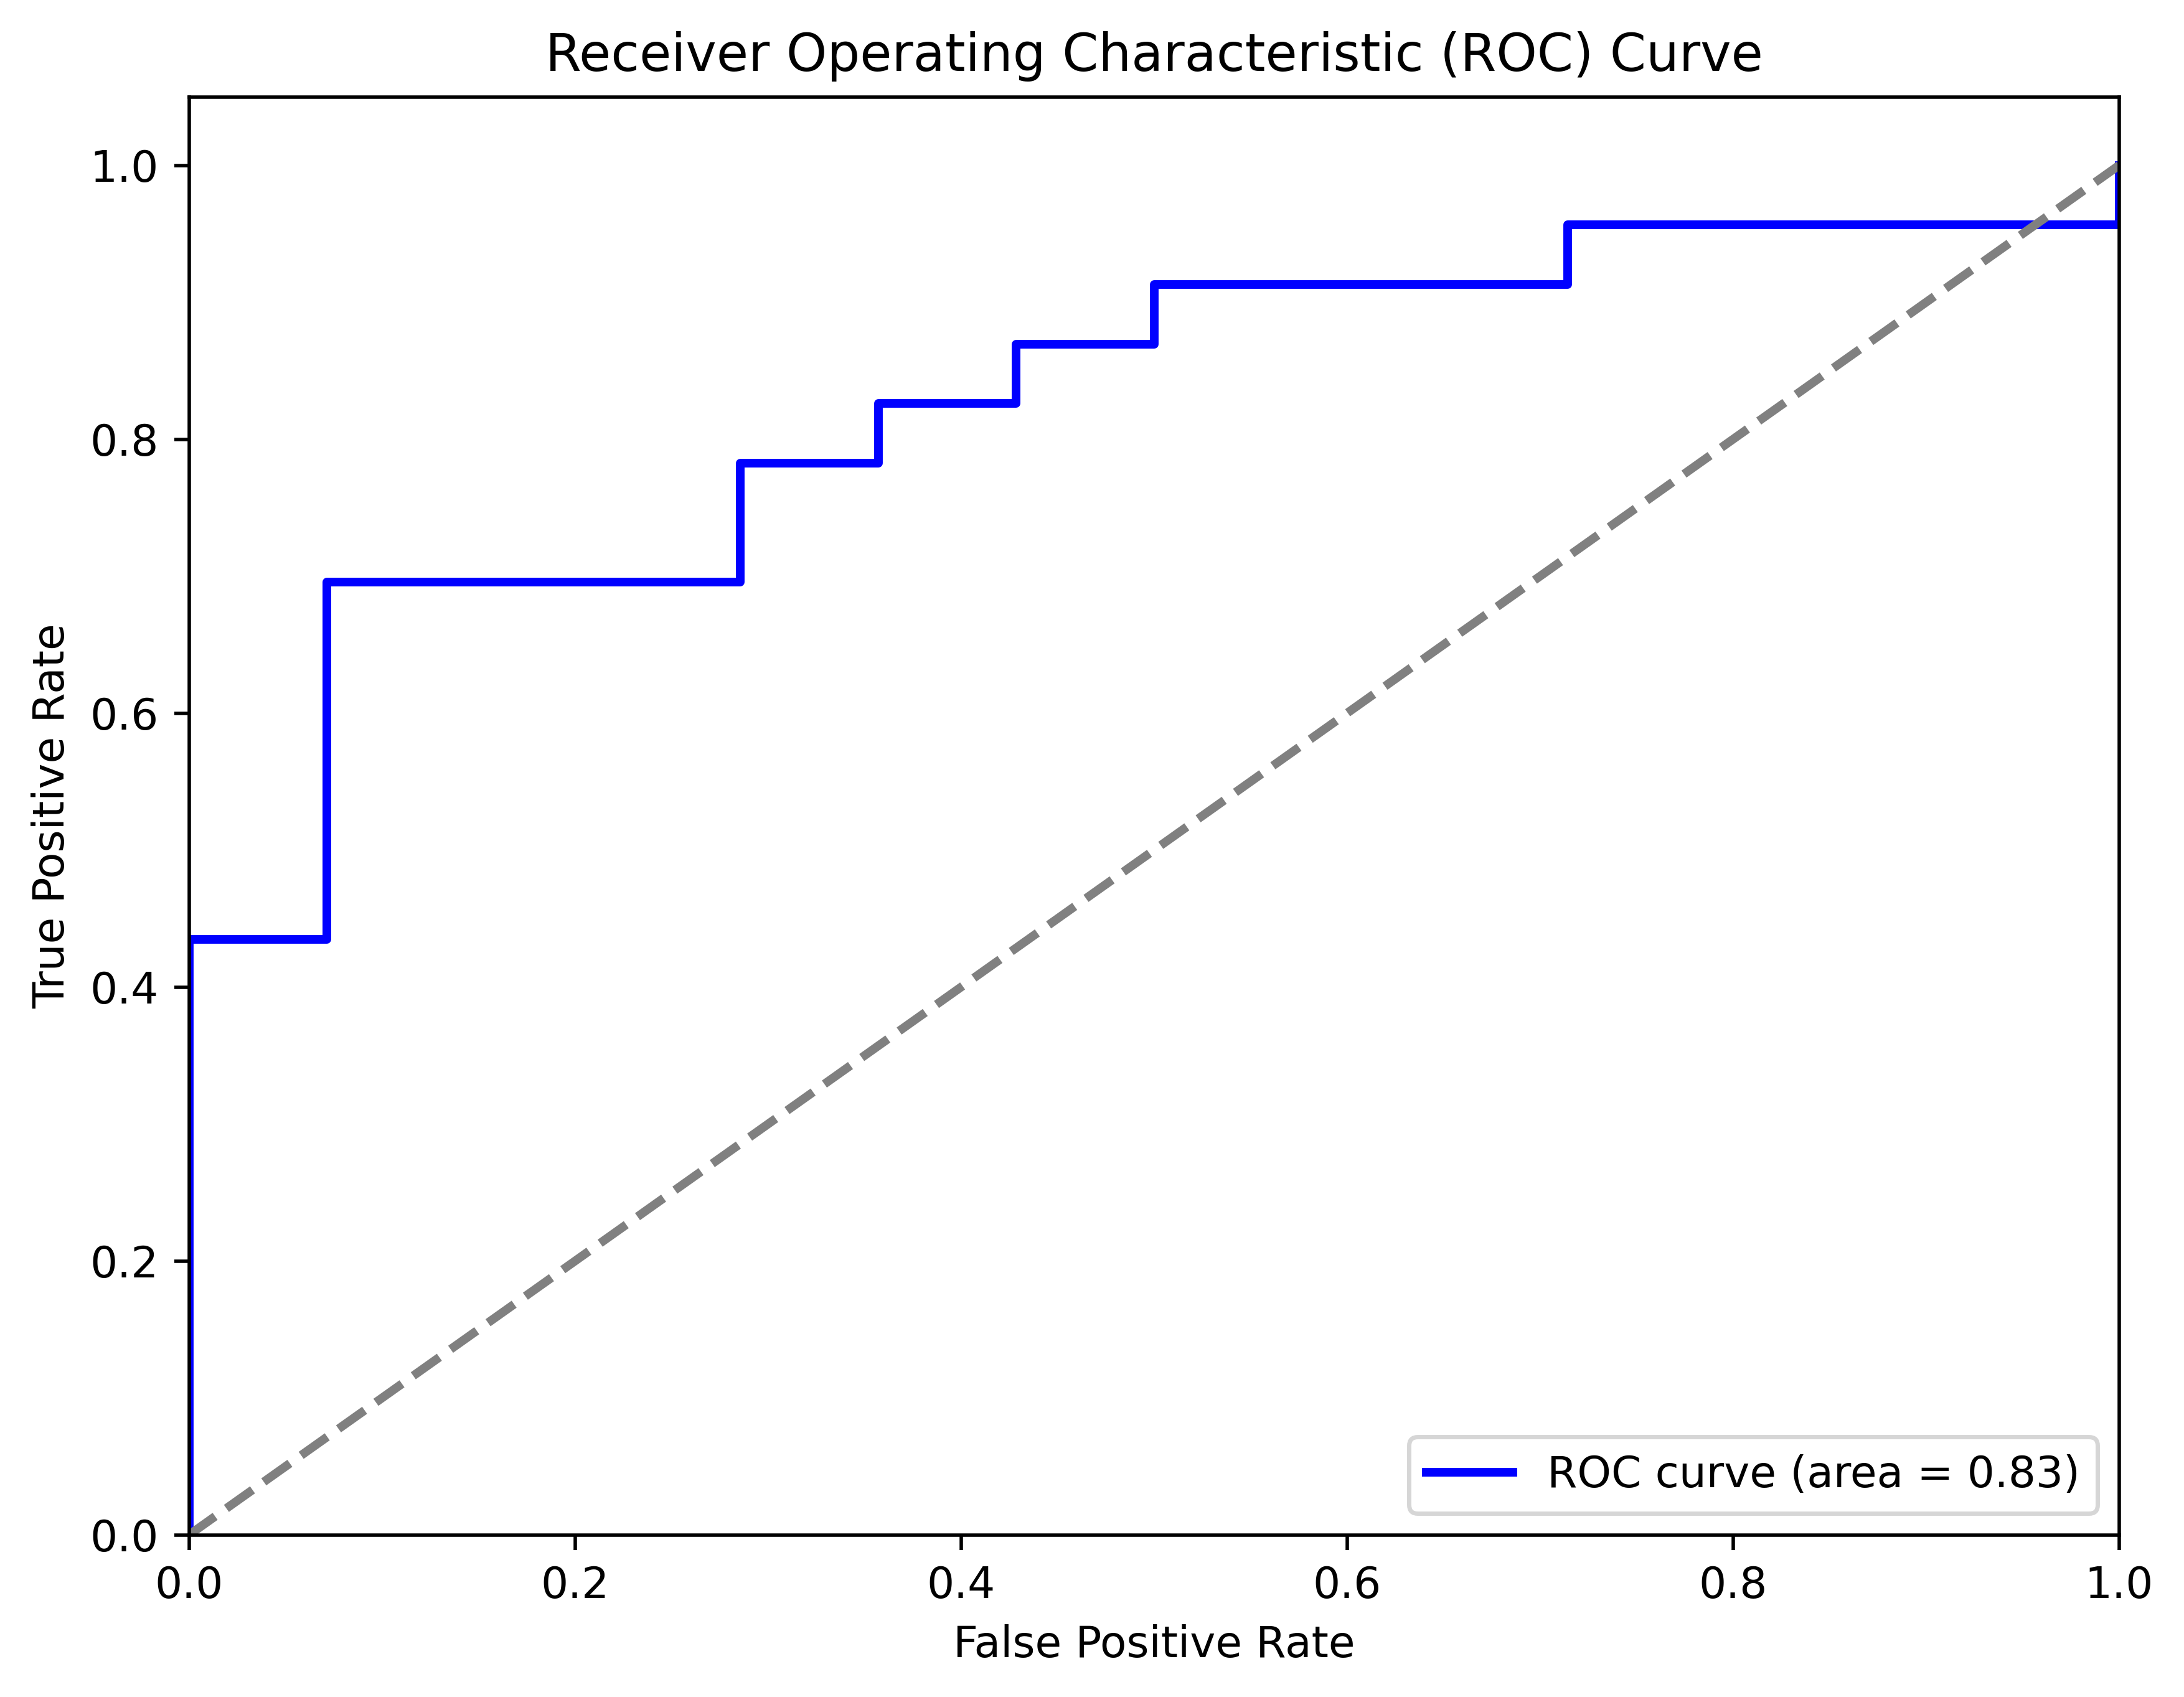

In [69]:
#Visualize the ROC curve
plt.figure(figsize=(8, 6)) #size of the graph
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')#fpr represents false +ve rate and tpr represents true +ve rate
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0]) #xlim is used to set the limits of the x-axis of a plot
plt.ylim([0.0, 1.05]) #ylim is used to set the limit of the y-axis of a plot
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

In [71]:
coefficients = pd.DataFrame(LR.coef_.T, index=data, columns=['Coefficient'])
print(coefficients)

          Coefficient
Pclass      -0.468762
Sex          2.368255
Age         -0.029137
SibSp       -0.071993
Parch       -0.325338
Fare         0.002379
Embarked     0.452528
